## 1. Import libraries

In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [102]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

## 2. Import data

In [103]:
path = r'C:\Users\Niklas Winter\Layoffs Analyse'

In [104]:
# 2.Importing data set Layoffs
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'layoffs_clean.csv'))


In [105]:
# 2.Importing data set Layoffs_num
df_num = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'layoffs_num.csv'))


In [106]:
df.head()

,Unnamed: 0,Company,Location,Industry,Laid_Off_Count,Date,Stage,Country,Percentage
0,0,GoTo Group,Jakarta,Transportation,600.0,2023-03-10,Post-IPO,Indonesia,0.18
1,1,Xero,Wellington,Finance,800.0,2023-03-09,Post-IPO,New Zealand,0.15
2,2,Shopee,Jakarta,Food,200.0,2023-03-09,Unknown,Indonesia,0.18
3,3,Gopuff,Philadelphia,Food,100.0,2023-03-09,Series H,United States,0.02
4,4,Wave Financial,Toronto,Finance,50.0,2023-03-09,Acquired,Canada,0.18


In [107]:
df = df.drop(columns = ['Unnamed: 0'])

In [108]:
#Export data
df.to_csv(os.path.join(path, '02 Data','Prepared Data', 'layoffs_clean.csv'))

## 3. Checking Data

In [109]:
# Check for missing values

df.isnull().sum()

Company           0
Location          0
Industry          0
Laid_Off_Count    0
Date              0
Stage             0
Country           0
Percentage        0
dtype: int64

In [110]:
dups = df.duplicated()

In [135]:
df['Laid_Off_Count'].mean() # Check the mean

188.08695652173913

In [136]:
df['Laid_Off_Count'].median() # Check the mean

80.0

In [137]:
df['Laid_Off_Count'].max() # Check the mean

12000.0

C:\Users\Niklas Winter\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Industry', ylabel='Density'>

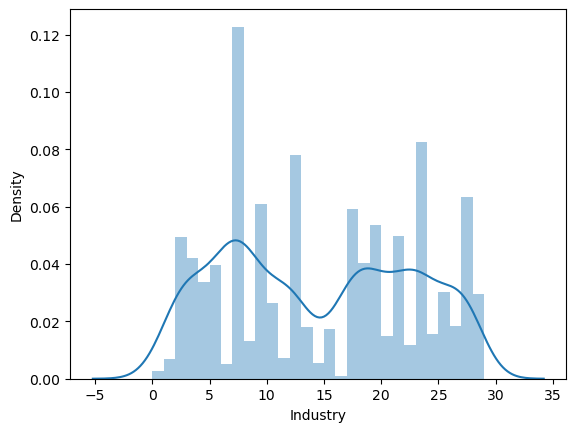

In [111]:
# Check for Extreme Values
sns.distplot(df_num['Industry'], bins=29)

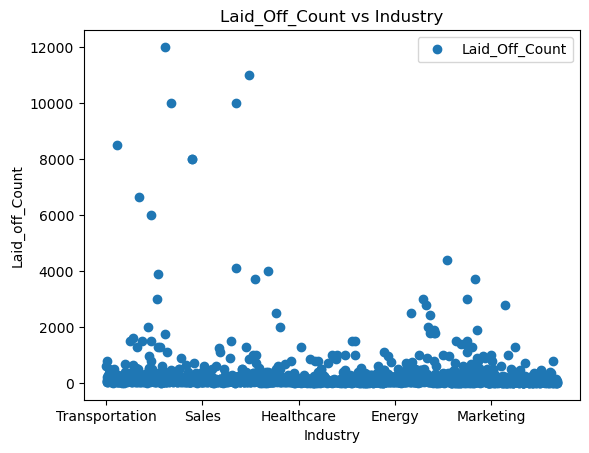

In [112]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Industry', y='Laid_Off_Count',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Laid_Off_Count vs Industry')  
plt.xlabel('Industry')  
plt.ylabel('Laid_off_Count')  
plt.show()

# 4. Data prep for regression analysis

In [113]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_num['Industry'].values.reshape(-1,1)
Y = df_num['Laid_Off_Count'].values.reshape(-1,1)

In [114]:
X

array([[27],
       [ 7],
       [ 9],
       ...,
       [ 2],
       [23],
       [15]], dtype=int64)

In [115]:
Y

array([[600.],
       [800.],
       [200.],
       ...,
       [  6.],
       [ 20.],
       [ 75.]])

In [116]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 5. Regression analysis

In [117]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [118]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(normalize=False)

In [119]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

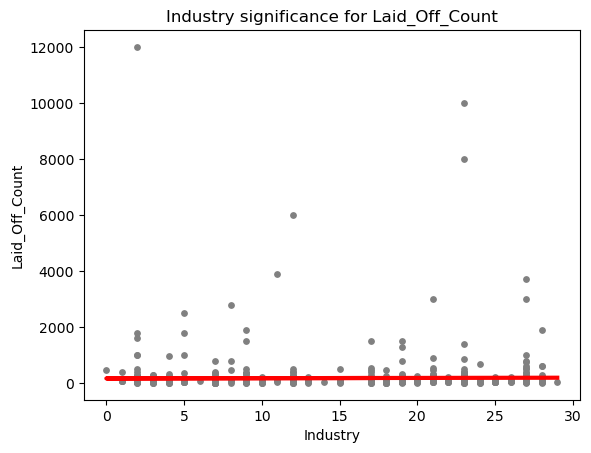

In [120]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Industry significance for Laid_Off_Count')
plot_test.xlabel('Industry')
plot_test.ylabel('Laid_Off_Count')
plot_test.show()

In [121]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [122]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.86952528]]
Mean squared error:  602165.0180619323
R2 score:  -0.0024025164302652335


In [123]:
y_predicted

array([[188.85789096],
       [180.16263816],
       [187.1188404 ],
       [183.64073928],
       [178.42358759],
       [169.72833479],
       [185.37978984],
       [187.1188404 ],
       [182.771214  ],
       [183.64073928],
       [176.68453703],
       [181.90168872],
       [186.24931512],
       [167.11975895],
       [171.46738535],
       [166.25023367],
       [181.90168872],
       [169.72833479],
       [171.46738535],
       [167.98928423],
       [165.38070839],
       [187.98836568],
       [171.46738535],
       [169.72833479],
       [183.64073928],
       [170.59786007],
       [171.46738535],
       [165.38070839],
       [181.03216344],
       [181.90168872],
       [183.64073928],
       [167.98928423],
       [166.25023367],
       [172.33691063],
       [167.98928423],
       [183.64073928],
       [183.64073928],
       [187.1188404 ],
       [180.16263816],
       [165.38070839],
       [179.29311287],
       [184.51026456],
       [165.38070839],
       [165

In [124]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,42.0,188.857891
1,54.0,180.162638
2,180.0,187.118840
3,80.0,183.640739
4,400.0,178.423588
5,80.0,169.728335
6,130.0,185.379790
7,80.0,187.118840
8,39.0,182.771214
9,110.0,183.640739


In [125]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [126]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [127]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.86952528]]
Mean squared error:  332576.79610828817
R2 score:  0.00015087638456645625


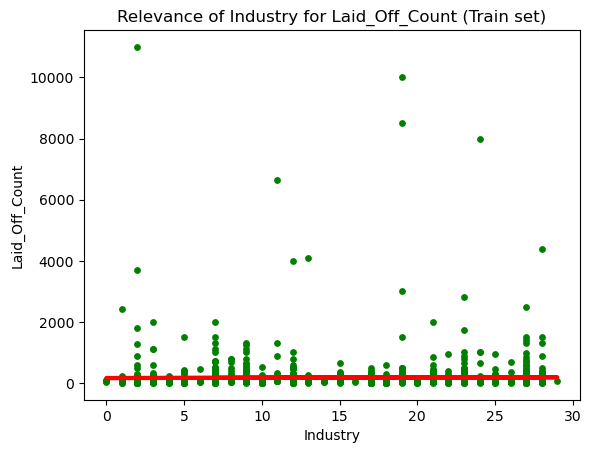

In [128]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Relevance of Industry for Laid_Off_Count (Train set)')
plot_test.xlabel('Industry')
plot_test.ylabel('Laid_Off_Count')
plot_test.show()


In [129]:
# Clean the extreme values from the "Price per Unit" variable observed during the consistency checks.

df_test = df_num[df_num['Laid_Off_Count'] <=5000] 

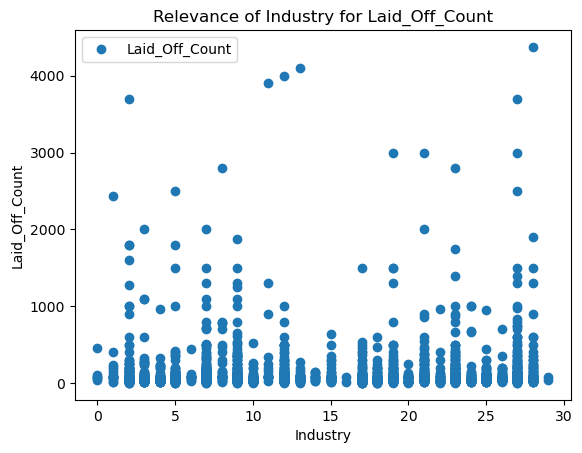

In [130]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'Industry', y='Laid_Off_Count', style='o')  
plt.title('Relevance of Industry for Laid_Off_Count')  
plt.xlabel('Industry')  
plt.ylabel('Laid_Off_Count')  
plt.show()

In [131]:
# Reshape again.

X_2 = df_test['Industry'].values.reshape(-1,1)
y_2 = df_test['Laid_Off_Count'].values.reshape(-1,1)

In [132]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [133]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [139]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [140]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [141]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.83504135]]
Mean squared error:  81874.08547021185
R2 score:  -0.004616292163630353


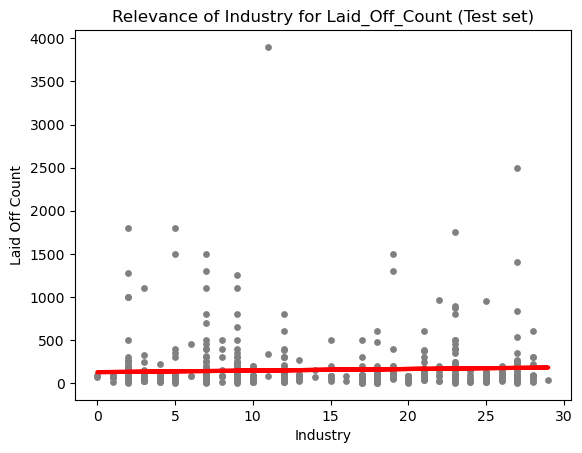

In [142]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Relevance of Industry for Laid_Off_Count (Test set)')
plot_test.xlabel('Industry')
plot_test.ylabel('Laid Off Count')
plot_test.show()

In [143]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,180.0,166.509401
1,13.0,140.818822
2,80.0,144.488905
3,80.0,144.488905
4,50.0,151.829070
5,45.0,166.509401
6,40.0,140.818822
7,80.0,166.509401
8,80.0,140.818822
9,500.0,170.179484


#### Observation: The outliers tend to move in the direction of the median.